In [24]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image




In [4]:
DATASET_PATH='chess'

In [6]:
datagen=ImageDataGenerator(
rescale=1/255.0, 
validation_split=0.2,
rotation_range=20,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2

)

In [7]:
train_data=datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"

)

Found 1576 images belonging to 6 classes.


In [8]:
test_data=datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 391 images belonging to 6 classes.


In [10]:
class_name=list(train_data.class_indices.keys())
class_name

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6,activation="softmax"))
model.add(Dropout(0.2))







c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,790,310 (14.46 MB)

 Trainable params: 3,790,310 (14.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)


In [18]:
history=model.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=early,
    batch_size=32,
    verbose=1
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.2151 - loss: 4.6549 - val_accuracy: 0.2379 - val_loss: 1.7682
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.2214 - loss: 4.3998 - val_accuracy: 0.2379 - val_loss: 1.7597
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.2259 - loss: 4.6161 - val_accuracy: 0.3018 - val_loss: 1.7389
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.2519 - loss: 4.4590 - val_accuracy: 0.2813 - val_loss: 1.6953
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.2678 - loss: 4.4208 - val_accuracy: 0.3785 - val_loss: 1.6644


In [19]:
loss,accuracy=model.evaluate(test_data)
print(f"loss:{loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3555 - loss: 1.6730 
loss:1.673047423362732


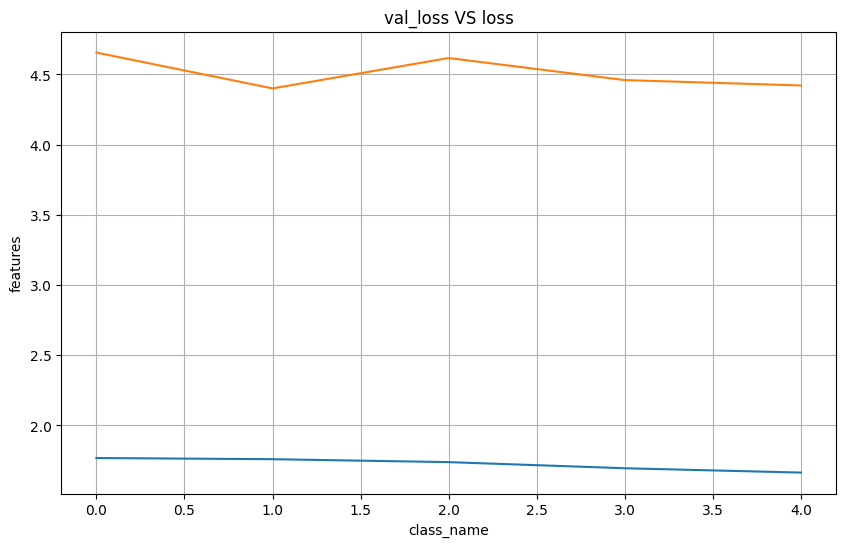

In [21]:
plt.figure(figsize=[10,6])
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.xlabel("class_name")
plt.ylabel("features")
plt.title("val_loss VS loss")
plt.grid(True)
plt.show()

In [ ]:
img_path="C:\Users\AKASH\OneDrive\Desktop\mechine_le\Deep Learning\CNN\chess\download.jpg"
img=image.load_img(img_path,target_size=(128,128))
img_array=image.img_to_array(img)
img_array=img_array/255.0
img_array=np.expand_dims(img_array,axis=0)

pred=model.predict(img_array)
prediction=np.argmax(pred)
prediction

plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.show()
